## Aufgabe 1: Bis 23.4.24
Wir wollen zunächst eine Vorübung machen und die Arbeitsumgebung vorbereiten. Dafür machen wir folgendes:
Ein Agent soll sich im $\mathbb{R}^2$ bewegen. Der Agent hat eine Position $x\in \mathbb{R}^2$ und eine Rotation $\theta \in [0,2\pi]$ und bewegt sich mit konstanter Geschwindigkeit vorwärts. In jedem Zeitschritt wählt er eine neue Rotation. 
Es sind Nahrungsquellen $(b_1,...,b_M)$ verteilt, die der Agent suchen soll.

**Evolutionäre Normalverteilung** 
1. Programming the Simulation
	- Zu Beginn werden M Nahrungsquellen im Raum verteilt. Die Positionen werden aus einer Normalverteilung (oder anderer Verteilung) $N(0, \phi)$ gezogen.
	- Es werden K *Generationen* mit jeweils n Schritten simuliert. In jeder Generation werden N Instanzen mit jeweils einem Agenten $(A_1,...,A_N)$ und M Nahrungsquellen erstellt. Der Parameter $\sigma$ der Agenten wird evolutionär ausgewählt:
		- Vor der ersten Generation werden diese zufällig initialisiert $\sigma \sim G([0,2*\pi])$ (Gleichverteilung).
		- Nach jeder beendeten Generation wird für jeden Agenten ein neuer sigma-Wert wie folgt ausgewählt: Ziehe zufällig ein $\sigma$ aus der Population des vorherigen Zyklus. Dabei ist $P(\sigma_i) = \frac{S(A_i)}{\sum_{i=1}^N S(A_i)}$. Nun wird ein kleiner Wert $\delta \sim G([-\epsilon, \epsilon])$ addiert, welcher eine Mutation beschreibt.
	- Agenten A haben eine Schrittzahl n, einen Score S, eine Geschwindigkeit v (für alle gleich), und ziehen die Rotation aus einer Normalverteilung $N(0,\sigma_A)$. 
	- Nach jeder Generation werden die Werte und der erreichte Score gespeichert und nach der letzen Generation wird die Verteilung der sigmas, sowie die erreichten Scores geplotted.
	- **Open Questions:** Generate the same food for all agents or always new random sample?	
2. Nachdem die Simulation nun funktioniert geht es an die Analyse und das Hinzufügen weiterer Funktionalität
	- Zuerst sollte es ermöglicht werden die Simulation zu speichern und zu laden und reproduzierbar zu machen.
	- Ergebnisse auf Github Zwischenspeichern
	- Kann ich ohne zu viel Aufwand die Instanzen auf der GPU laufen lassen? Das könnte die Performance erheblich verbessern.
	- Analysen:
		- Simulation: Mittelwerte, Sigma-Verteilungen, msd, etc plotten. Genauer werden in den Fragestellungen.
		- Analytisch: Analyse der Simulation mit mathematischen Methoden

In [2]:
import numpy as np
import matplotlib as plt

from normal_search import *

In [5]:
# simulation parameters:
num_generations = 25 # I think 25 generations should be enough
num_instances = 100 
gen_lenth = 1000

mutation_rate = 0.05 # evolution parameter

num_food = 100 # fix this at 100 maybe?
normal_scale = 50

agent_detection_radius = 10
agent_step_length = 1 # leave this fixed

random_seed = 3 # reproducibility

params = {"num_generations": num_generations, "num_instances": num_instances, "gen_length": gen_lenth, "mutation_rate": mutation_rate, "num_food": num_food, "normal_scale": normal_scale, 
          "detection_radius": agent_detection_radius, "step_length": agent_step_length, "seed": random_seed}
sim = Simulation(params)
sim.run_sim()


simulating generation 0...
simulating generation 1...
simulating generation 2...
simulating generation 3...
simulating generation 4...
simulating generation 5...
simulating generation 6...
simulating generation 7...
simulating generation 8...
simulating generation 9...
simulating generation 10...
simulating generation 11...
simulating generation 12...
simulating generation 13...
simulating generation 14...
simulating generation 15...
simulating generation 16...
simulating generation 17...
simulating generation 18...
simulating generation 19...
simulating generation 20...
simulating generation 21...
simulating generation 22...
simulating generation 23...
simulating generation 24...


In [3]:
if False:
    print("how?")
sim = load_data("data/sim_saves/sim_25gen2.pkl")

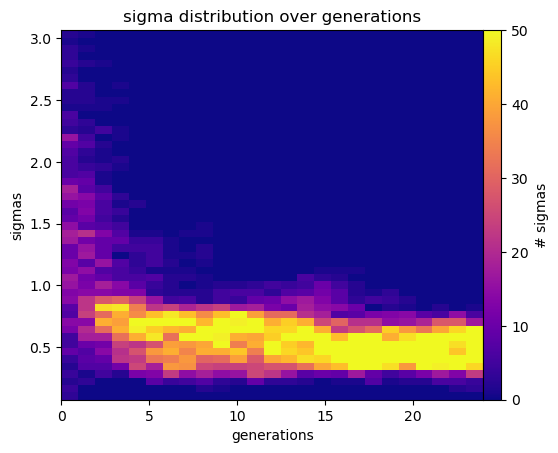

In [4]:

# source for plotting: https://matplotlib.org/stable/gallery/statistics/time_series_histogram.html
plot_sigma_dist(sim.all_sigmas.T)

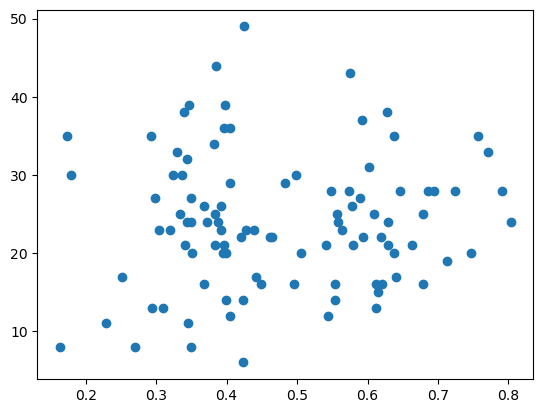

In [5]:
sim.generations[-1].plot_scores()

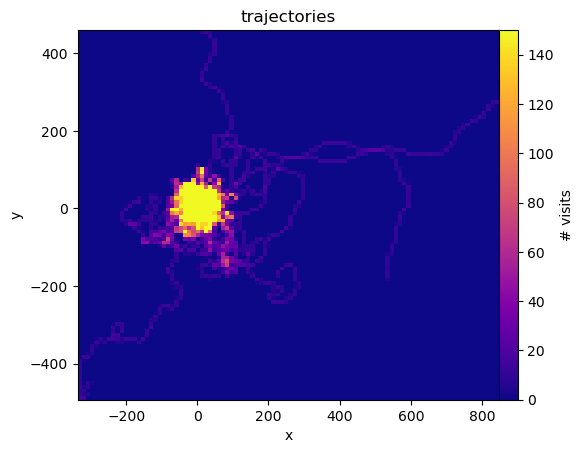

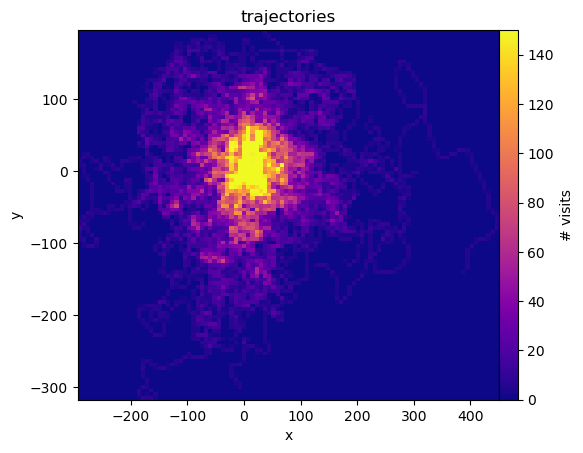

In [4]:
show_generation_trajectories(sim.generations[0])
show_generation_trajectories(sim.generations[-1])

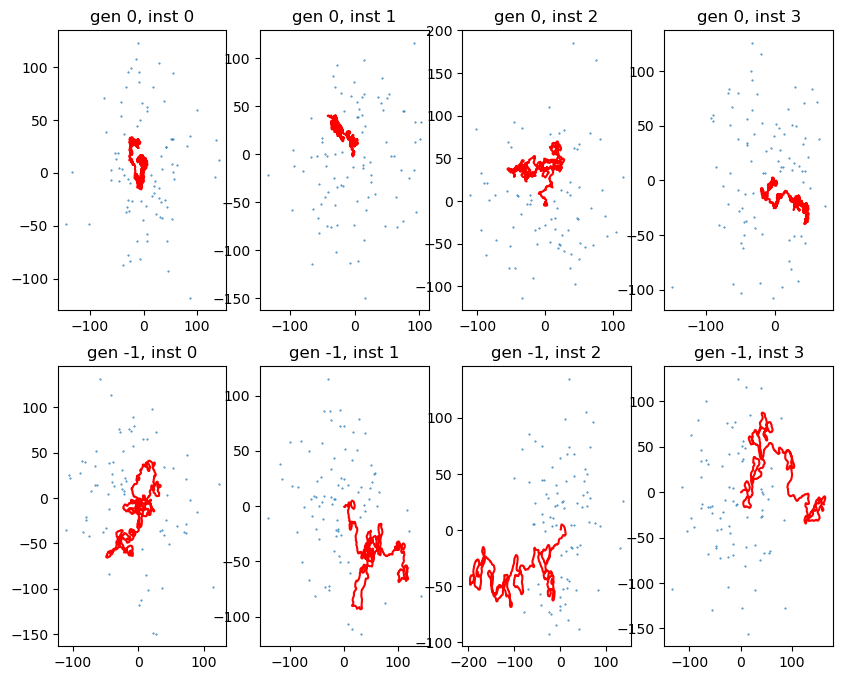

In [5]:
# plot trajectories:
gen = [0, -1]
inst = [0, 1, 2, 3]
plot_sample_trajectories(sim, gen, inst)

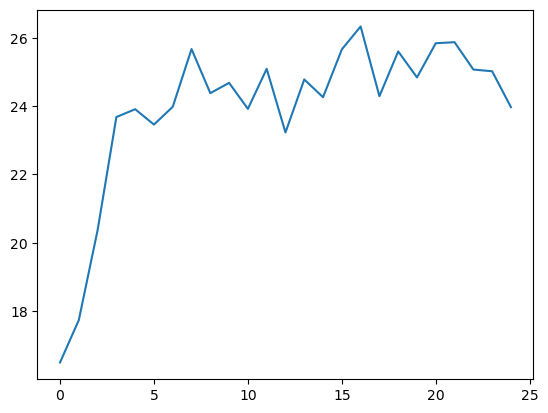

In [6]:
plt.plot(analyze_results(sim))
plt.show()

In [7]:
path = "data/sim_saves/sim_25gen2.pkl"
save_data(sim,path)

Saved data/sim_saves/sim_25gen2.pkl (43637.411 kB)
